# Regresión Logística
Este notebook está hecho para la práctica de regresión logística en Scikitlearn

Para regresión logísitca se requiere
* Variable dependiente debe ser categórica o numérica discreta
* Si es una regresión logística binaria el valor 1 en la variable dependiente debe ser la categoria deseada
* Solo variables significantes deben ser incluídas.
* Las variables independintes deben ser independintes entre ellas.

El dataset fue obtenido de UCI Machine Learning repository, y esta relacionado con campañas de marqueting (llamadas telefónicas) de una institución bancaria. El objetivo de la clasificación es prevenir si el cliente va o no a adquirir un CDT

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

## Dataset
* Cargar el Dataset https://raw.githubusercontent.com/javiercocu/intro-datascience/master/data/bank-additional-full.csv en un DataFrame con la funcion pd.read_csv()
* La descripción del dataset se encuentra en: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
df_banking = pd.read_csv("https://raw.githubusercontent.com/javiercocu/intro-datascience/master/data/bank-additional-full.csv", sep=";")
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_banking.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Ejercicio
Realizar Análisis inicial y estadística descriptiva,
* Explore los datos, valores únicos por columna con la funcion unique()
* Verificar si hay datos faltantes
* Qué se debería hacer con los datos faltantes?
* Qué tipo de variables estadísticas son cada una de las características
* Use la funcion df_boston.describe() para analizar los principales datos de estadística descriptiva del DataSet
* Cree gráficos de histogramas
* Cree un gráfico de la matriz de correlación del DataFrame
    * ¿Cuáles de las características tienen alta correlación entre ellas?
* ¿Cuáles de las caractarísticas tienen más relación con la variable objetivo según diagramas de dispersión?

* Incluir dentro del análisis visual para las variables categóricas ('job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome') un gráfico de barras contra variable objetivo

```python
pd.crosstab(df_banking.job,df_banking.y).plot(kind='bar')
plt.title('CDT abiertos por trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia de CDT abiertos')```

In [4]:
#Celdas para completar ejercicio








Text(0,0.5,'Frecuencia de CDT abiertos')

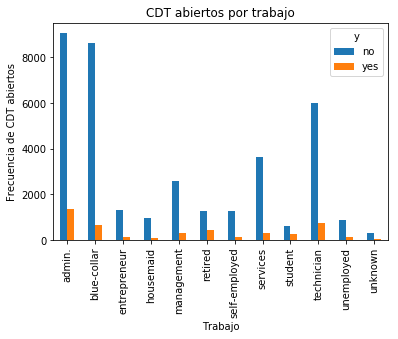

In [10]:
df_banking["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [11]:
#Agrupamiento de valores
dic_reemplazo = {'basic.4y':'basic', 'high.school':'basic', 'basic.6y':'basic', 'basic.9y':'basic'}

df_banking['education'] = df_banking['education'].replace(dic_reemplazo)
df_banking["education"].unique()

array(['basic', 'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [12]:
# Frecuencias de la variable objetivo
df_banking['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [13]:
# Agrupar por variable objetivo para descubrir posibles relaciones
df_banking.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
### Qué se observa de esta agrupación contra la variable objetivo?



In [22]:
# Convertir variables categóricas en uno a muchos

# Variables categóricas
variables_cat=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for var_cat in variables_cat:
    df_banking2 = df_banking.join(pd.get_dummies(df_banking[var_cat], prefix = var_cat))
    df_banking = df_banking2
df_banking.keys()


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       

In [23]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,basic,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,basic,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56,services,married,basic,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


In [25]:
lista_columnas = df_banking.columns.tolist()
lista_columnas

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'mon

In [29]:
columnas_sin_cat = []
for columna in lista_columnas:
    if columna not in variables_cat:
        columnas_sin_cat.append(columna)
        
columnas_sin_cat

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_w

In [44]:
df_banking_final = df_banking[columnas_sin_cat]
df_banking_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week

In [45]:
# transformación variable objetivo en binario
df_banking_final['y'] = df_banking_final['y'].map({'no':0,'yes':1})

In [49]:
# Valores unicos en variable dependiente
df_banking_final['y'].unique()

array([0, 1])

In [54]:
# Separar datasets de variables independientes X, y variable objetivo Y

X = df_banking_final.drop('y', axis=1)
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu'

In [58]:
y = df_banking_final['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)
print('La precisión del modelo de regresión logística en el set de test es:', logreg.score(X_test, y_test))

La precisión del modelo de regresión logística en el set de test es: 0.911224407219


### Validación cruzada 
Trata de prevenir el sobreajuste (overfitting) mientras se entrena con todo el dataset.
En este caso usaremos 10 divisiones sobre el dataset.

In [67]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Promedio de precisión sobre validación cruazada: %.3f" % (results.mean()))

Promedio de precisión sobre validación cruazada: 0.910


Como el promedio de precisión sobre la validación cruzada es cercano a la precisión del modelo, esto quiere decir que el modelo generaliza bien

### Matriz de confusión

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10682   287]
 [  810   578]]


### Precisión y exhaustividad

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10969
          1       0.67      0.42      0.51      1388

avg / total       0.90      0.91      0.90     12357



La precisión y exhaustividad (denominado a veces como exhaustividad y precisión) es una métrica empleada en la medida del rendimiento de los sistemas de búsqueda y recuperación de información y reconocimiento de patrones. En este contexto se denomina precisión (denominado igualmente valor positivo predicho) como a la fracción de instancias recuperadas que son relevantes, mientras recall (denominado igualmente sensibilidad o exhaustividad) es la fracción de instancias relevantes que han sido recuperadas.1 Tanto la precisión como la exhaustividad son entendidas como medidas de la relevancia. Para entender mejor el concepto, supongamos de la existencia de un programa que reconoce perros en fotografías, dicho programa reconoce 7 perros en una escena que contiene 9 perros y algunos gatos. Si 4 de las identificaciones han sido correctas, pero 3 eran gatos, el programa tendrá una precisión de 4/7 mientras que posee una sensibilidad de 4/9. Otro ejemplo en el que participa un motor de búsqueda que, ante una consulta dada, retorna 30 páginas de las cuales sólo 20 son relevantes dejando 40 páginas relevantes fuera de la búsqueda. Este motor tendrá entonces una precisión de 20/30 = 2/3 mientras que su sensibilidad es 20/60 = 1/3.

Para un usuario la situación ideal es aquella en la que existe una precisión y exhaustividad alta (es decir muy cercana a 1). A esta situación se la denomina utilidad teórica. Con el objeto de ponderar y ver cual lejano se encuentran ambas medidas del la utilidad teórica, suele emplearse los valores de ambas métricas combinadas en una media armónica denominada valor-F.

(Extraído de wikipedia)